In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import keras
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)



#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

C:\Users\supertaco512\AppData\Roaming\Python\Python37\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
DATA_DIR = 'pizza types'
data = keras.utils.image_dataset_from_directory(
    DATA_DIR,
    batch_size=8
)

Found 211 files belonging to 5 classes.


In [3]:
BATCH_SIZE = 8
IMG_HEIGHT = 28
IMG_WIDTH = 28

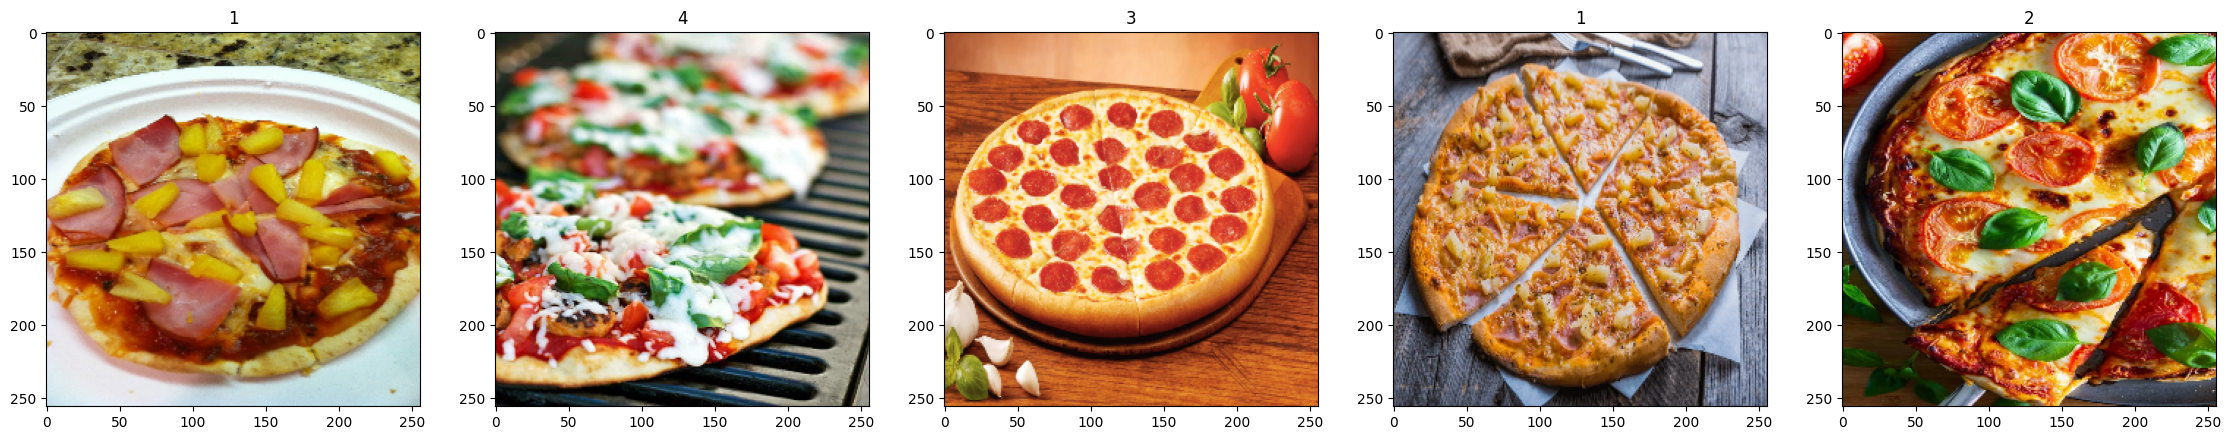

In [4]:
data_iterator = data.as_numpy_iterator()

batch = data_iterator.next()

fig, ax = plt.subplots(ncols=5, figsize=(28,28))
for i, img in enumerate(batch[0][:5]):
    ax[i].imshow(img.astype(int))
    ax[i].title.set_text(batch[1][i])

In [5]:
data = data.map(lambda x,y: (x/255, y))

In [6]:
train_size = int(len(data)*0.8)
test_size = int(len(data)*0.2)

In [7]:
train_ds = data.take(train_size)
test_ds = data.skip(train_size).take(test_size)

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [9]:
model = Sequential()

In [10]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile('adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [ ]:
hist = model.fit(train_ds, epochs=50, verbose=0)

In [ ]:
hist.history['accuracy']

In [ ]:
model.predict(test_ds)